# **Sentiment Analysis of Amazon Product Reviews: All Beauty Category**

## Project Overview

Customer reviews on e-commerce platforms such as Amazon are a valuable source of insights into customer satisfaction, product quality, and overall brand perception. This project focuses on sentiment analysis of customer reviews in the 'All Beauty' category on Amazon.


#### Module submission group
- Group member 1: Aishwarya Shastry Viswanath (as6285@drexel.edu)
- Group member 2: Mi Kin Swan (ms5795@drexel.edu)
- Group member 3: Fatimah Aljohani (fa583@drexel.edu)

In [ ]:
# Import core data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for text processing and regular expressions
import re
import spacy

# Import progress bar and word cloud generation tools
from tqdm.notebook import tqdm
from wordcloud import WordCloud


# Data Collection

In [ ]:
# Mount Google Drive to access datasets stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify the file path to the Amazon beauty reviews CSV file stored in Google Drive
file_path = '/content/drive/MyDrive/PROJECT AMAZON/raw_review_All_Beauty.csv'

In [ ]:
# Install the Hugging Face 'datasets' library to access the metadata
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
from datasets import load_dataset

# Load the All_Beauty reviews
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

# Access the full split
reviews = dataset["full"]

# Display the first review
print(reviews[0])


Generating full split: 0 examples [00:00, ? examples/s]

{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


In [ ]:
reviews

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 701528
})

In [ ]:
# Show the first 10 rows
for i in range(10):
    print(reviews[i])


{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 4.0, 'title': 'Works great but smells a little weird.', 'text': 'This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)', 'images': [], 'asin': 'B081TJ8YS3', 'parent_asin': 'B081TJ8YS3', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1

In [ ]:
import pandas as pd

df = pd.DataFrame(reviews)

In [ ]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [ ]:
df.shape

(701528, 10)

In [ ]:
df.to_csv('raw_review_All_Beauty.csv', index=False)

In [ ]:
pip install requests

In [ ]:
import requests

# URL of the metadata file
url = "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_All_Beauty.jsonl"

# Local file name to save
output_file = "meta_All_Beauty.jsonl"

# Download the file
response = requests.get(url, stream=True)

if response.status_code == 200:
    with open(output_file, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
    print(f"Download complete. File saved as {output_file}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

Download complete. File saved as meta_All_Beauty.jsonl


In [ ]:
df_meta = pd.read_json("/content/drive/MyDrive/PROJECT AMAZON/meta_All_Beauty.jsonl", lines=True)

In [ ]:
df_meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


In [ ]:
!curl -L -o meta_All_Beauty.jsonl "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_All_Beauty.jsonl"


import pandas as pd

df_meta = pd.read_json("meta_All_Beauty.jsonl", lines=True)
df_meta.head()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1118  100  1118    0     0   5323      0 --:--:-- --:--:-- --:--:--  5349
100  203M  100  203M    0     0   146M      0  0:00:01  0:00:01 --:--:--  213M


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


# Reading and Cleaning the data

In [ ]:
import json
import pandas as pd

clean_data = []

with open("/content/drive/MyDrive/DSCI-521/meta_All_Beauty.jsonl", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        try:
            clean_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Skipping line {i} due to error: {e}")
            continue

# converting json to datafram
df_meta = pd.DataFrame(clean_data)


df_meta.head()


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,None


In [ ]:
df_meta.shape

(112590, 14)

In [ ]:
df_meta.columns

Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together'],
      dtype='object')

In [ ]:
# reading reviews from google drive
df_reviews = pd.read_csv("/content/drive/MyDrive/PROJECT AMAZON/raw_review_All_Beauty.csv")
df_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [ ]:
df_reviews.shape

(701528, 10)

In [ ]:
df_reviews.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [ ]:
#Merge with Product Metadata
df_combined = pd.merge(df_reviews, df_meta, on="parent_asin", how="left")


In [ ]:
df_combined.head()

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,...,384,[],"[If given the choice, weÕd leave most telltale...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Best Hair Product For Summer!', 'u...",HERBIVORE,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",None
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,...,56,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Easy to apply!', 'url': 'https://w...",Two Goats Apothecary,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",None
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,...,699,"[Same Great Product, NEW PACKAGING., MOISTURIZ...",[New Road Beauty Paraffin Wax is recommended f...,21.98,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Opening the Creamsicle assortment ...,New Road Beauty,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,None
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,...,1,[?Hair Bundle Material?:Brazilian Virgin Human...,[Hair Material: Brazilian Virgin Human Hair Bu...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],muaowig,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",None
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,...,20,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yinhua,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,None


In [ ]:
df_combined.shape


(701528, 23)

In [ ]:
df_combined.columns

Index(['rating', 'title_x', 'text', 'images_x', 'asin', 'parent_asin',
       'user_id', 'timestamp', 'helpful_vote', 'verified_purchase',
       'main_category', 'title_y', 'average_rating', 'rating_number',
       'features', 'description', 'price', 'images_y', 'videos', 'store',
       'categories', 'details', 'bought_together'],
      dtype='object')

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title_x            701368 non-null  object 
 2   text               701316 non-null  object 
 3   images_x           701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
 10  main_category      701528 non-null  object 
 11  title_y            701528 non-null  object 
 12  average_rating     701528 non-null  float64
 13  rating_number      701528 non-null  int64  
 14  features           701528 non-null  object 
 15  description        701528 non-null  object 
 16  pr

In [ ]:
# saving the combine dataset

df_combined.to_csv('All_Beauty.csv', index=False)

In [ ]:
# rename the duplicate columns
df_combined = df_combined.rename(columns={
    "title_x": "review_title",
    "title_y": "product_title",
    "images_x": "review_images",
    "images_y": "product_images",
    "text": "review_text"
})


In [ ]:
df_combined.columns

Index(['rating', 'review_title', 'review_text', 'review_images', 'asin',
       'parent_asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase', 'main_category', 'product_title', 'average_rating',
       'rating_number', 'features', 'description', 'price', 'product_images',
       'videos', 'store', 'categories', 'details', 'bought_together'],
      dtype='object')

In [ ]:
df_combined.isnull().sum().sort_values(ascending=False)

,0
bought_together,701528
price,515905
store,49892
review_text,212
review_title,160
review_images,0
rating,0
user_id,0
parent_asin,0
asin,0


In [ ]:
df_combined["rating"].unique()

array([5, 4, 1, 3, 2])

In [ ]:
# convert rating in to int
df_combined["rating"] = df_combined["rating"].astype(int)


In [ ]:
df_combined["rating"].unique()

array([5, 4, 1, 3, 2])

In [ ]:
# Define a function to map rating to sentiment
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating <= 2:
        return "negative"
    else:
        return "neutral"

# Apply the sentiment function to create a new column
df_combined["sentiment"] = df_combined["rating"].apply(label_sentiment)

# Display the unique values to verify
df_combined["sentiment"].value_counts()

,count
sentiment,
positive,500107
negative,145114
neutral,56307


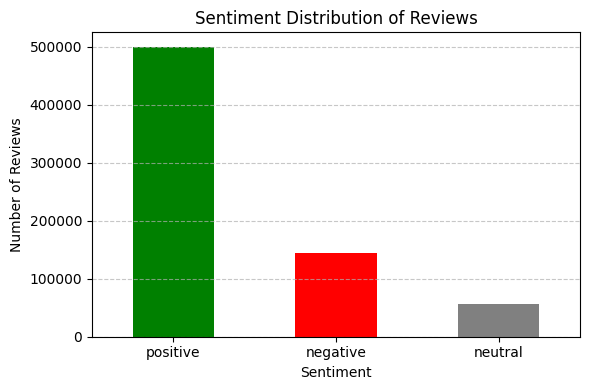

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reviews per sentiment category
sentiment_counts = df_combined["sentiment"].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Add titles and labels
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-63-041e4c2fc451>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y="price", data=df_combined, palette=sentiment_palette)


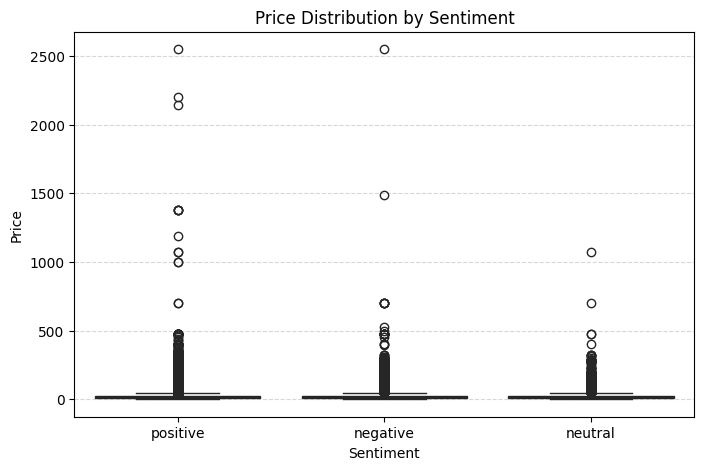

In [ ]:
# explore the rating based in the price

import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for sentiment
sentiment_palette = {
    "positive": "green",
    "neutral": "gray",
    "negative": "red"
}

# Boxplot: Price distribution by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x="sentiment", y="price", data=df_combined, palette=sentiment_palette)
plt.title("Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



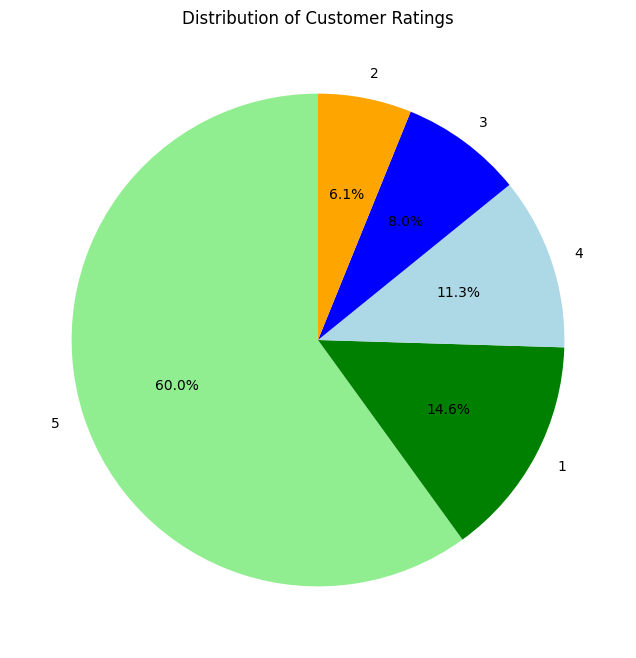

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_combined is already loaded

# Calculate rating counts
rating_counts = df_combined['rating'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['lightgreen', 'green', 'lightblue', 'blue', 'orange'])
plt.title('Distribution of Customer Ratings')
plt.show()

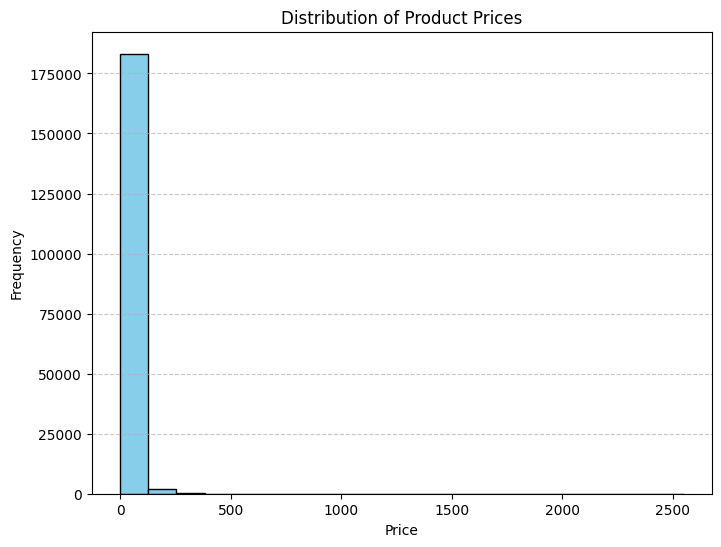

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-70-68aaa2c5d68e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


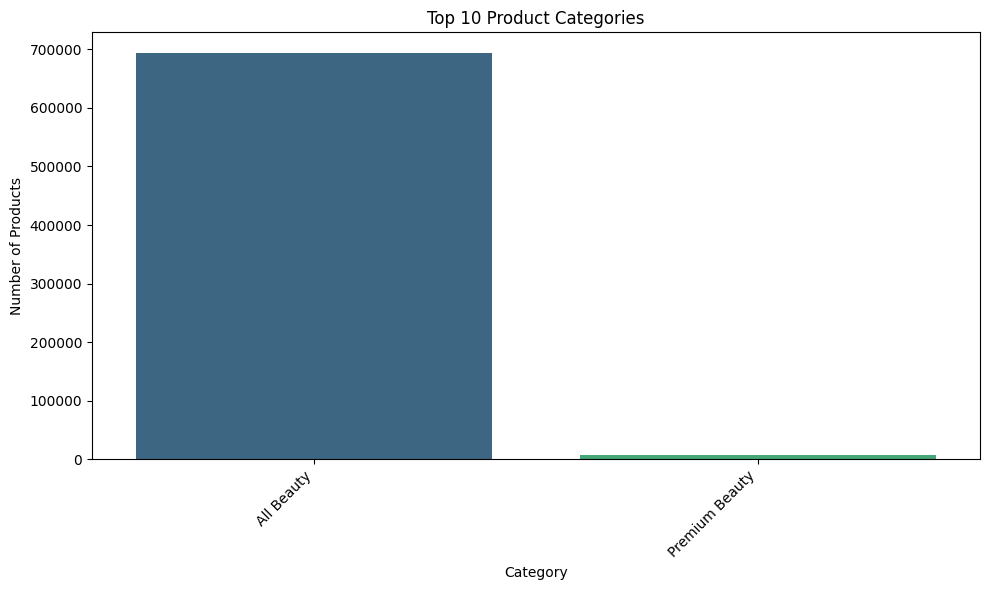

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'main_category' or 'categories' exists
if 'main_category' in df_combined.columns:
    top_categories = df_combined['main_category'].value_counts().head(10)
elif 'categories' in df_combined.columns and isinstance(df_combined['categories'].iloc[0], list):
    # Assuming 'categories' contains lists of categories, flatten and count
    all_categories = [cat for sublist in df_combined['categories'].tolist() for cat in sublist]
    top_categories = pd.Series(all_categories).value_counts().head(10)
else:
    print("Neither 'main_category' nor 'categories' column found with expected format.")

    # If neither of the above works, you might need to examine the DataFrame further
    # to see if any column represents category information under a different name.
    # Print the column names to check:
    print(df_combined.columns)

# Only proceed if top_categories is defined
if 'top_categories' in locals():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
    plt.title('Top 10 Product Categories')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

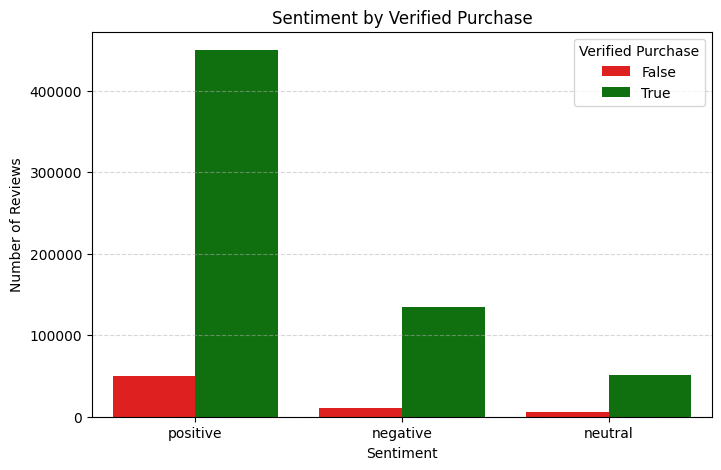

In [ ]:
# explore Sentiment count by Verified Purchase
plt.figure(figsize=(8, 5))

# Map True/False to strings for the palette
verified_palette = {True: "green", False: "red"}

sns.countplot(x="sentiment", hue="verified_purchase", data=df_combined, palette=verified_palette)
plt.title("Sentiment by Verified Purchase")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.legend(title="Verified Purchase")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
from os import pipe
def clean_text(df,text):
  text = df_combined[text].fillna('').astype(str).to_list()
  nlp = spacy.load("en_core_web_sm")
  clean_text = []
  for doc in tqdm(nlp.pipe(text,batch_size= 1000,disable=["ner", "parser"]), total=len(text)):
    stop_words = nlp.Defaults.stop_words
    important_words = {"not", "no", "never", "very", "just", "really","like","empty","ten","must","serious","yes"}
    custom_stopwords = stop_words.difference(important_words)
    tokens =[
        word.lemma_.lower().strip()
        for word in doc
        if not word.is_punct and not word.is_space and word.text.lower() not in custom_stopwords and not word.like_num and word.pos_ in{"NOUN", "VERB", "ADJ", "ADV"}
    ]
    clean_text.append(" ".join(tokens))
  return clean_text

In [ ]:
df_combined['clean_title'] = clean_text(df_combined,'review_title')

  0%|          | 0/701528 [00:00<?, ?it/s]

In [ ]:
df_combined['clean_text'] = clean_text(df_combined,'review_text')

  0%|          | 0/701528 [00:00<?, ?it/s]

In [ ]:
 # saving the clean dataset

df_combined.to_csv('All_Beauty_cleaned.csv', index=False)

### Loading the Cleaned Dataset  
In this section, we load the preprocessed version of the Amazon Beauty dataset.



In [ ]:
# reading the cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/DSCI-521/All_Beauty_cleaned.csv")
df.head()

,rating,review_title,review_text,review_images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,product_images,videos,store,categories,details,bought_together,review_date,clean_title,clean_text,clean_review
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Best Hair Product For Summer!', 'u...",HERBIVORE,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN,NaN,lovely scent overpower,spray really nice smell really good go really ...,lovely scent overpower spray really nice smell...
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Easy to apply!', 'url': 'https://w...",Two Goats Apothecary,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN,NaN,work great smell little weird,product need just wish odorless soft coconut s...,work great smell little weird product need jus...
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Opening the Creamsicle assortment ...,New Road Beauty,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN,NaN,NaN,smell good feel great,smell good feel great
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[],muaowig,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN,NaN,synthetic feeling,felt synthetic,synthetic feeling felt synthetic
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yinhua,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN,NaN,NaN,love,love


In [ ]:
# converting timestamp type to date

df['review_date'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

In [ ]:
# Convert timestamp from milliseconds to datetime
df['review_date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Optional: extract year/month for analysis
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month

# Check the result
print(df[['timestamp', 'review_date', 'review_year', 'review_month']].head())


       timestamp             review_date  review_year  review_month
0  1588687728923 2020-05-05 14:08:48.923         2020             5
1  1588615855070 2020-05-04 18:10:55.070         2020             5
2  1589665266052 2020-05-16 21:41:06.052         2020             5
3  1643393630220 2022-01-28 18:13:50.220         2022             1
4  1609322563534 2020-12-30 10:02:43.534         2020            12


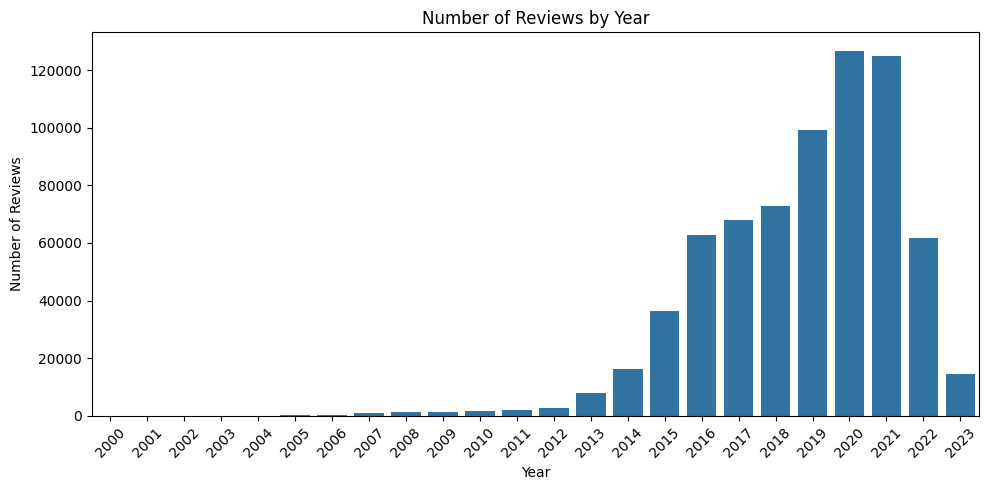

In [ ]:
# Plot number of reviews by year
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='review_year', order=sorted(df['review_year'].dropna().unique()))
plt.title("Number of Reviews by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Convert timestamp from milliseconds to datetime
df['review_date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Drop the original timestamp column if not needed
df.drop('timestamp', axis=1, inplace=True)

# Optional: Reorder columns to place 'review_date' earlier
# Move 'review_date' to the 4th column (for example)
cols = list(df.columns)
cols.insert(3, cols.pop(cols.index('review_date')))
df = df[cols]

# Check a sample
df.sample(5)


,rating,review_title,review_text,review_date,review_images,asin,parent_asin,user_id,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month
467293,2.0,Scalp not giving,Hair will not lay puffy parts are not seen as ...,2023-01-27 17:58:10.746,[],B0BH89WMZS,B0BH89WMZS,AHOZ2KIBPU7CDLM7UBR6YBMR5PQA,2,True,...,"[{'title': 'Professional attitude, advanced te...",HERMOUS,[],{'Product Dimensions': '10 x 3 x 7 inches; 9.9...,NaN,scalp give,hair lay puffy part see picture pluck part pon...,scalp give hair lay puffy part see picture plu...,2023,1
371164,2.0,Gets dry fast,It only lasted a week after that it was dry,2021-11-12 20:23:34.708,[],B085KVCHM3,B085KVCHM3,AFY7GZ5EJC544BZQ4B4TXZOAQ42Q,0,True,...,[],LINXI,[],"{'Color': 'Black', 'Product Benefits': 'Hypoal...",NaN,get dry fast,last week dry,get dry fast last week dry,2021,11
350416,5.0,Good product,Impressed by the strength of the product that ...,2020-01-06 00:19:00.574,[],B01HVZQZ3W,B01HVZQZ3W,AGISDPLSIYZJGYFTLAVDR4ZSJCHQ,4,True,...,[{'title': '1 Month Review - Nair Face Cream H...,AVON,[],"{'Item Form': 'Cream', 'Skin Type': 'Sensitive...",NaN,good product,impressed strength product destroy extremely s...,good product impressed strength product destro...,2020,1
646638,2.0,Closure,The hair is nice and soft. The flip side is 1)...,2022-12-29 04:25:29.800,[],B07H553MYM,B0BNKHNWDW,AF3DCDSNITPYFEE763CGSXWALXNA,0,True,...,[],QTHAIR,[],"{'Brand': 'QTHAIR', 'Color': '#613 Color', 'Ma...",NaN,closure,hair nice soft flip closure piece start bald v...,closure hair nice soft flip closure piece star...,2022,12
31197,5.0,Good,I had to return because the UV light made me f...,2019-11-26 00:59:44.210,[],B07JQGSYCL,B07JQGSYCL,AGSHQXIZR2D5VE3DNOGETSV4YEGA,0,True,...,[],SKYUV,[],"{'Brand': 'SKYUV', 'Special Feature': 'Motion ...",NaN,good,return uv light feel nauseous go try led compa...,good return uv light feel nauseous go try led ...,2019,11


In [ ]:
df.sample(5)

,rating,review_title,review_text,review_date,review_images,asin,parent_asin,user_id,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month
541060,5.0,Muy bien,Excelente,2019-08-05 13:48:54.380,[],B00OK6YMSG,B00OK6YMSG,AEBISH5IQIWNPBMDQAFGKB7X2PEQ,0,True,...,[{'title': 'AW 210D Black Soft Makeup Box Trai...,AW,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",NaN,bien,excelente,bien excelente,2019,8
350868,5.0,Great Product!,I’m a professional nail tech I bought this dri...,2021-09-17 02:00:33.423,"[{'attachment_type': 'IMAGE', 'large_image_url...",B09FD6S7WS,B09FD6S7WS,AFQAXSG2IAUZW3ZTKF42VQICM4CA,5,False,...,"[{'title': 'Beginner friendly', 'url': 'https:...",FLOVES,[],{'Package Dimensions': '7.6 x 5.51 x 3.78 inch...,NaN,product,professional nail tech buy drill old start ama...,product professional nail tech buy drill old s...,2021,9
15725,1.0,Is not ok to sell used items. Unacceptable.,The item was used and half empty. Just like ot...,2019-12-07 04:07:03.412,[],B01FSMJW7Q,B01FSMJW7Q,AHWTSNY2DI35FWF5MP5JBLJLA4KA,0,True,...,[],Beau Gel,[],"{'Brand': 'Beau Gel', 'Item Form': 'Gel', 'Col...",NaN,ok sell item unacceptable,item half empty just customer complaint review...,ok sell item unacceptable item half empty just...,2019,12
290661,1.0,Not real,I have used this product before and this does ...,2018-11-25 18:02:19.420,[],B01L0GF35Y,B07JHHJXMG,AGZX4OFMPWHNCJYZTVBANMB74ACA,0,True,...,[{'title': 'Tarte Shape Tape is a Longtime Fav...,Tarte,[],"{'Item Form': 'Clay', 'Color': 'Beige', 'Skin ...",NaN,real,product resemble shape tape runny coverage,real product resemble shape tape runny coverage,2018,11
596507,5.0,Five Stars,Love the color and goes well with almost every...,2015-03-13 01:19:53.000,[],B004Z0O9KS,B004Z0O9KS,AGLPNMMRDNGDR7PPL7SUH2XKA56A,0,True,...,[],Mary Kay,[],{'Package Dimensions': '2.91 x 1.54 x 0.47 inc...,NaN,star,love color go,star love color go,2015,3


In [ ]:
df.head()

,rating,review_title,review_text,review_date,review_images,asin,parent_asin,user_id,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True,...,"[{'title': 'Best Hair Product For Summer!', 'u...",HERBIVORE,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN,lovely scent overpower,spray really nice smell really good go really ...,lovely scent overpower spray really nice smell...,2020,5
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,True,...,"[{'title': 'Easy to apply!', 'url': 'https://w...",Two Goats Apothecary,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN,work great smell little weird,product need just wish odorless soft coconut s...,work great smell little weird product need jus...,2020,5
2,5.0,Yes!,"Smells good, feels great!",2020-05-16 21:41:06.052,[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,True,...,[{'title': 'Opening the Creamsicle assortment ...,New Road Beauty,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN,NaN,smell good feel great,smell good feel great,2020,5
3,1.0,Synthetic feeling,Felt synthetic,2022-01-28 18:13:50.220,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,...,[],muaowig,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN,synthetic feeling,felt synthetic,synthetic feeling felt synthetic,2022,1
4,5.0,A+,Love it,2020-12-30 10:02:43.534,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,...,[],Yinhua,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN,NaN,love,love,2020,12


In [ ]:
df['categories'].fillna('[]', inplace=True)

<ipython-input-11-06f514a316fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['categories'].fillna('[]', inplace=True)


In [ ]:
df['categories'] = df['categories'].apply(lambda x: eval(x))


In [ ]:
df['clean_review'] = df['clean_title'] + " " + df['clean_text']

In [ ]:
df.sample(5)

,rating,review_title,review_text,review_date,review_images,asin,parent_asin,user_id,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month
8367,3.0,It's alright,Everything works fine but the cuticle nippers ...,2022-04-05 19:05:14.077,[],B0896YPYXK,B0896YPYXK,AG32W4IXZZ6TCNA2V5TS7LKCUYIA,0,True,...,[],Mudder,[],{'Package Dimensions': '6.38 x 4.57 x 0.31 inc...,NaN,alright,work fine cuticle nipper l hard use skin well ...,alright work fine cuticle nipper l hard use sk...,2022,4
106693,1.0,Don't waste your money,Used one after a pedicure and skin did not fee...,2022-02-23 20:06:51.298,[],B07KFGWC8S,B07KFGWC8S,AH7UJWMBEZYC5ILP2M356PH3BPAQ,0,True,...,[],Amope,[],"{'Brand': 'Amope', 'Item Form': 'Sheet', 'Prod...",NaN,waste money,pedicure skin feel soft help crack skin worthless,waste money pedicure skin feel soft help crack...,2022,2
120674,1.0,Completely Flimsy and NOT worth the cost,For this kind of money it's not worth it. Thin...,2013-05-15 04:06:12.000,[],B005FMUBLG,B005FMUBLG,AG6YTVBJDBXNTCX4ZXC7DND5WSPQ,23,True,...,[],Annie,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",NaN,completely flimsy worth cost,kind money worth think zip lock bag well painf...,completely flimsy worth cost kind money worth ...,2013,5
675270,5.0,Perfect item!!!!,This uv light is amazing! It’s worth every penny!,2018-01-02 05:39:20.360,[],B01EWACUE2,B01EWACUE2,AFIT5BPZHXNM6DSF46NJTVYHNFOA,0,True,...,[{'title': 'I am very pleased and I highly rec...,BuySShow,[],"{'Brand': 'BuySShow', 'Control Method': 'Remot...",NaN,perfect item,uv light amazing worth penny,perfect item uv light amazing worth penny,2018,1
204336,5.0,As advertised,Was a gift for my daughter. Have heard no comp...,2019-01-21 03:44:31.640,[],B074NDQ4H3,B074NDQ4H3,AGVFX2GFAQWCQFRQE7YABGK2KBUQ,0,True,...,"[{'title': 'What is your favorite color?', 'ur...",Profusion Cosmetics,[],"{'Brand': 'Profusion Cosmetics', 'Finish Type'...",NaN,advertise,gift daughter hear complaint far,advertise gift daughter hear complaint far,2019,1


In [ ]:
# Remove duplicates
df.drop_duplicates(subset='clean_text', inplace=True)



In [ ]:
df.drop(columns=['review_images'], inplace=True)


In [ ]:
# Convert string dict to actual dict
from ast import literal_eval
df['details_dict'] = df['details'].apply(lambda x: literal_eval(x) if pd.notnull(x) else {})

# Extract a sample feature
df['Hair_Type'] = df['details_dict'].apply(lambda x: x.get('Hair Type', None))


In [ ]:
# Function to safely convert strings to dictionaries
def safe_literal_eval(x):
    try:
        return literal_eval(x) if isinstance(x, str) and x not in ['', 'nan'] else {}
    except (ValueError, SyntaxError):  # Handle malformed strings
        return {}

# Convert string dict to actual dict, handling errors
df['details_dict'] = df['details'].apply(safe_literal_eval)

# Extract 'Hair Type' feature, providing a default value
df['Hair_Type'] = df['details_dict'].apply(lambda x: x.get('Hair Type', 'Unknown'))

In [ ]:
df['helpful_bin'] = pd.cut(df['helpful_vote'], bins=[-1, 0, 2, 10, 50, 1000], labels=['0', '1-2', '3-10', '11-50', '50+'])


In [ ]:
df.head()


,rating,review_title,review_text,review_date,asin,parent_asin,user_id,helpful_vote,verified_purchase,main_category,...,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month,details_dict,Hair_Type,helpful_bin
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True,All Beauty,...,"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN,lovely scent overpower,spray really nice smell really good go really ...,lovely scent overpower spray really nice smell...,2020,5,"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",Wavy,0
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,True,All Beauty,...,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN,work great smell little weird,product need just wish odorless soft coconut s...,work great smell little weird product need jus...,2020,5,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Unknown,1-2
2,5.0,Yes!,"Smells good, feels great!",2020-05-16 21:41:06.052,B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,True,All Beauty,...,{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN,NaN,smell good feel great,NaN,2020,5,{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,Unknown,1-2
3,1.0,Synthetic feeling,Felt synthetic,2022-01-28 18:13:50.220,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,All Beauty,...,"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN,synthetic feeling,felt synthetic,synthetic feeling felt synthetic,2022,1,"{'Brand': 'muaowig', 'Material': 'Human Hair',...",Wavy,0
4,5.0,A+,Love it,2020-12-30 10:02:43.534,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,All Beauty,...,{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN,NaN,love,NaN,2020,12,{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,Unknown,0


In [ ]:
import pandas as pd

# Define a function to extract sub-category from the product title
def extract_subcategory(title):
    if pd.isnull(title):
        return "Unknown"

    # Convert title to lowercase for easier keyword matching
    title = title.lower()

    # Classify based on presence of keywords in the title
    if any(keyword in title for keyword in ["shampoo", "conditioner", "hair"]):
        return "Hair Care"
    elif any(keyword in title for keyword in ["moisturizer", "serum", "cream", "lotion", "cleanser", "face wash"]):
        return "Skin Care"
    elif any(keyword in title for keyword in ["lipstick", "mascara", "eyeshadow", "foundation", "concealer", "blush"]):
        return "Makeup"
    elif any(keyword in title for keyword in ["perfume", "fragrance", "eau de", "cologne"]):
        return "Fragrance"
    elif any(keyword in title for keyword in ["body wash", "soap", "scrub", "bath"]):
        return "Body Care"
    elif any(keyword in title for keyword in ["nail", "polish", "manicure", "pedicure"]):
        return "Nail Care"
    elif any(keyword in title for keyword in ["sunscreen", "spf", "sunblock"]):
        return "Sun Care"
    elif any(keyword in title for keyword in ["deodorant", "antiperspirant"]):
        return "Deodorant"
    else:
        return "Other"

# Apply the function to classify products based on their title
df["sub_category"] = df["product_title"].apply(extract_subcategory)

# Display the frequency of each sub-category
df["sub_category"].value_counts()

,count
sub_category,
Other,247965
Hair Care,172662
Nail Care,52886
Skin Care,50829
Body Care,28878
Makeup,27382
Fragrance,12108
Deodorant,5928
Sun Care,2312


<ipython-input-22-ecba62e1b8fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette='viridis')


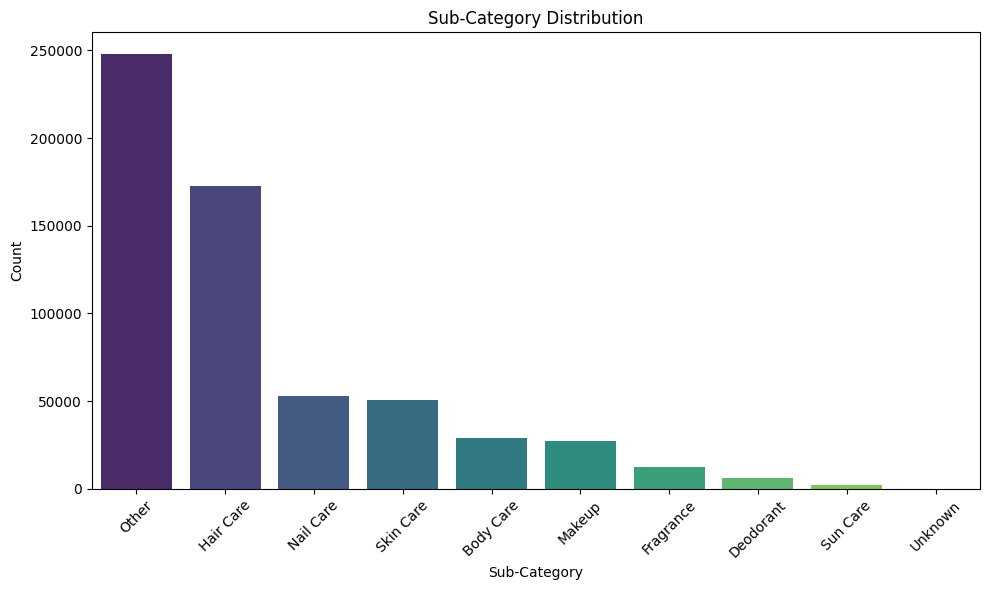

In [ ]:
#plot
import matplotlib.pyplot as plt
import seaborn as sns
sub_category_counts = df['sub_category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette='viridis')
plt.title('Sub-Category Distribution')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
df = df[~df['sub_category'].isin(['Unknown'])]  # Remove Unknowns


In [ ]:
small_cats = ['Fragrance', 'Deodorant', 'Sun Care']
df['sub_category_grouped'] = df['sub_category'].apply(lambda x: x if x not in small_cats else 'Other')


In [ ]:
# Create sentiment labels from ratings
df['Sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

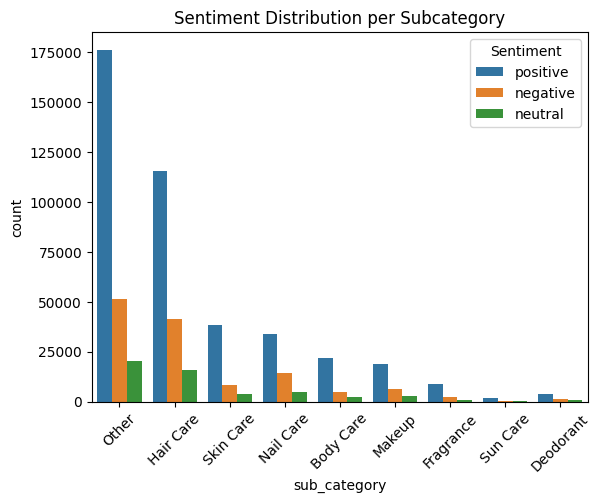

In [ ]:
sns.countplot(data=df, x='sub_category', hue='Sentiment')
plt.xticks(rotation=45)
plt.title('Sentiment Distribution per Subcategory')
plt.show()


<ipython-input-31-ee720ee57a3c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(), rotation=90)


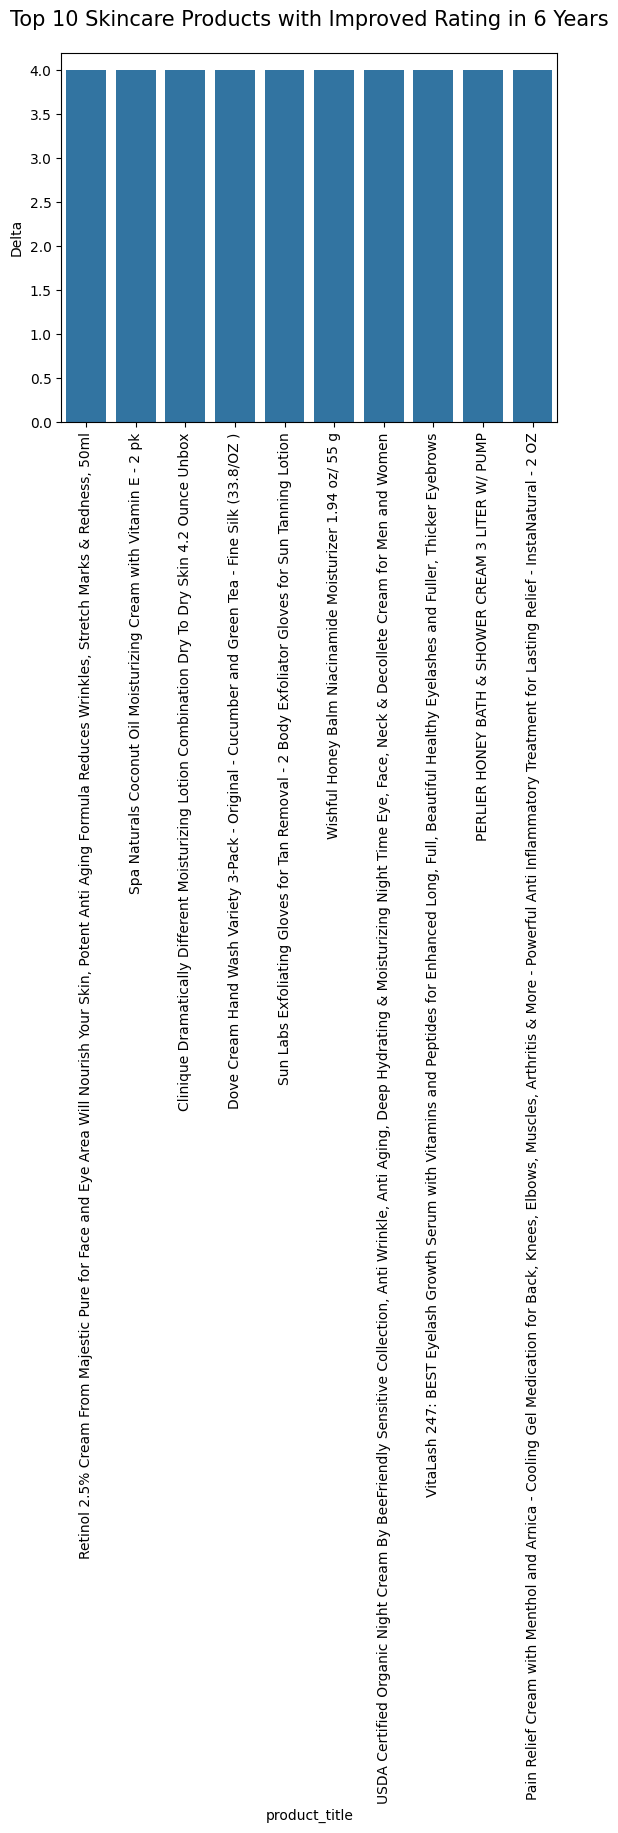

In [ ]:

import pandas as pd


# Calculate the change in rating over 6 years

df['Delta'] = df.groupby('product_title')['rating'].diff(periods=6)  # Difference over 6 years

# Filter for skincare products and select top 10 with highest improvement
# Replace 'sub_category' with the column representing product category if it's not 'category'
top_10_rise_skin = df[df['sub_category'] == 'Skin Care'].sort_values(by='Delta', ascending=False).head(10)

# Create the barplot
Top_10_plt = sns.barplot(x='product_title', y='Delta', data=top_10_rise_skin)  # Use the DataFrame directly
Top_10_plt.set_title('Top 10 Skincare Products with Improved Rating in 6 Years', fontsize=15, y=1.05)
Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
# each product classification
df['main_category'].value_counts()


,count
main_category,
All Beauty,593148
Premium Beauty,6316


In [ ]:
# See nulls
df.isnull().sum().sort_values(ascending=False)

# Drop rows with missing clean_review or sentiment
df = df.dropna(subset=['clean_review', 'sentiment'])


In [ ]:
# Create a new binary feature: was the review helpful or not
df['helpful'] = df['helpful_vote'].apply(lambda x: 1 if x > 0 else 0)

# You can also look at helpfulness by sentiment:
helpful_summary = df.groupby('sentiment')['helpful_vote'].mean()
helpful_summary

,helpful_vote
sentiment,
negative,0.957540
neutral,0.772779
positive,1.081741


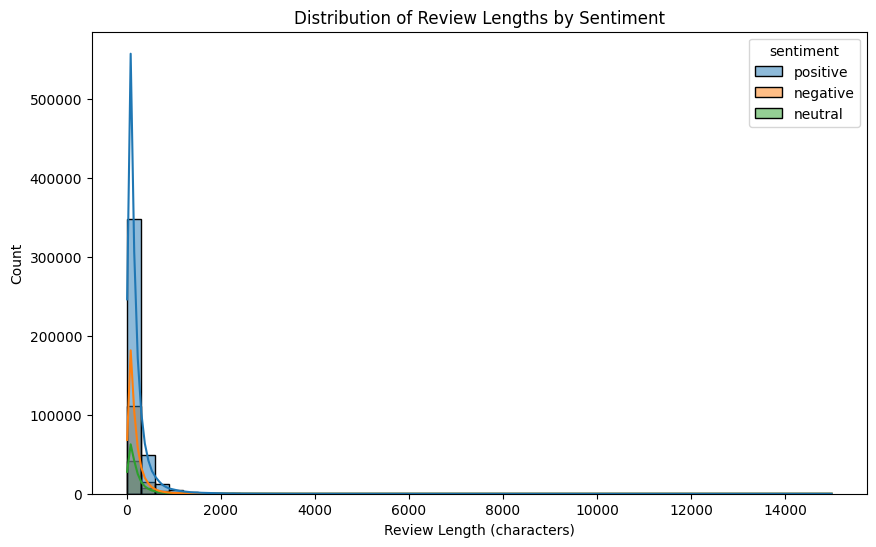

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', bins=50, hue='sentiment', kde=True)
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Review Length (characters)")
plt.ylabel("Count")
plt.show()


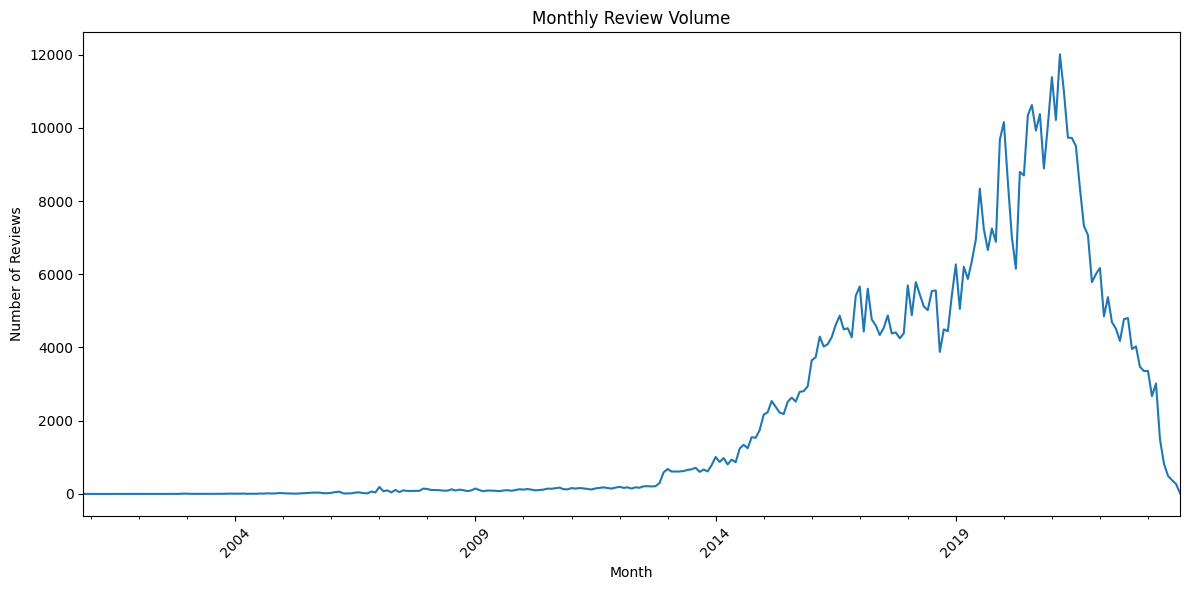

In [ ]:
# Monthly reviews over time
df['review_month'] = df['review_date'].dt.to_period('M')
monthly_reviews = df.groupby('review_month').size()

monthly_reviews.plot(kind='line', figsize=(12, 6), title='Monthly Review Volume')
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


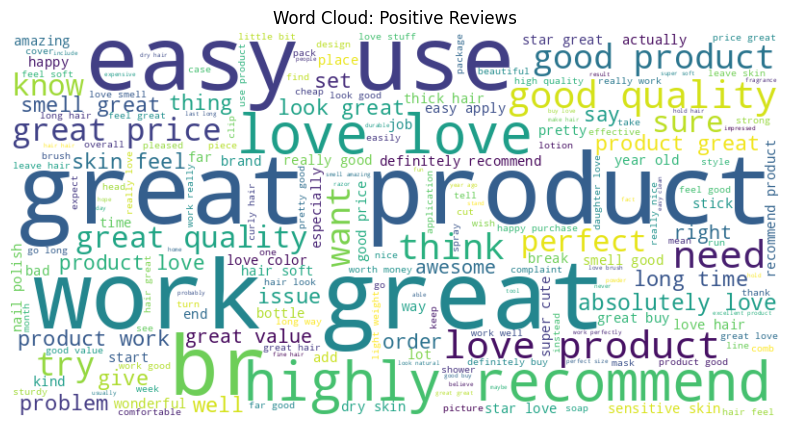

In [ ]:
from wordcloud import WordCloud

# Positive word cloud
text_pos = " ".join(df[df['sentiment'] == 'positive']['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(text_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Positive Reviews")
plt.show()


In [ ]:
#list of all produtcs category
df['main_category'].unique()


array(['All Beauty', 'Premium Beauty'], dtype=object)

In [ ]:
# Filter the DataFrame to select rows where the 'main_category' column equals 'All Beauty'
filtered_df = df[df['main_category'] == 'All Beauty']

# Get the unique values in the 'main_category' column of the filtered DataFrame
unique_categories = filtered_df['main_category'].unique()

# Print the unique categories (should only be 'All Beauty' if the filtering worked)
print(unique_categories)

['All Beauty']


In [ ]:
print(df['main_category'].unique())

['All Beauty' 'Premium Beauty']


In [ ]:
from collections import Counter
def word_count(df, text_column):
    texts = df[text_column].to_list()
    count = Counter()
    for text in texts:
        words = text.split()  # Split by spaces to get words
        count.update(words)
    return count

In [ ]:


def word_count(df, text_column):
    texts = df[text_column].astype(str).to_list()  # Convert to string type
    count = Counter()
    for text in texts:
        # Handle NaN values (which might have been converted to 'nan' strings)
        if isinstance(text, str) and text.lower() != 'nan':
          words = text.split()  # Split by spaces to get words
          count.update(words)
    return count

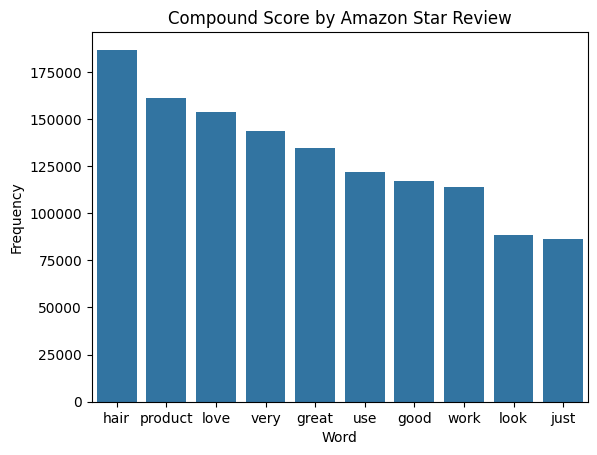

In [ ]:
# Show top 10 frequent words
word_freq = word_count(df, 'clean_text')
top_10_words = word_freq.most_common(10)
top_10_words = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])

# Correct the column names in the sns.barplot call:
ax = sns.barplot(data=top_10_words, x='Word', y='Frequency')  # Use 'Word' and 'Frequency'

ax.set_title('Compound Score by Amazon Star Review')
plt.show()

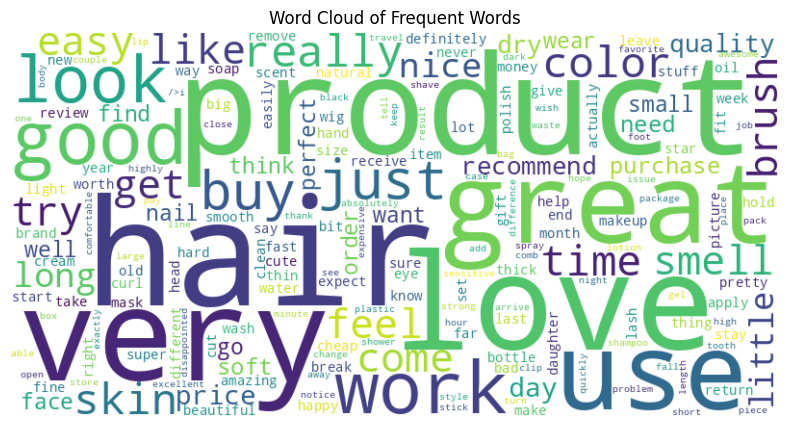

In [ ]:
word_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words')
plt.show()

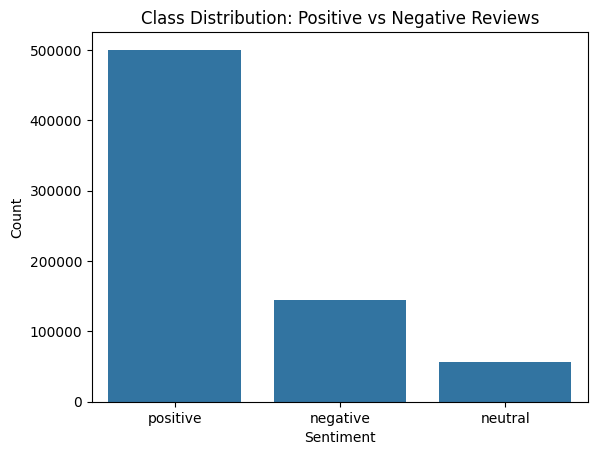

sentiment
positive    0.712882
negative    0.206854
neutral     0.080263
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='sentiment')
plt.title("Class Distribution: Positive vs Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Check actual counts/ratios
print(df['sentiment'].value_counts(normalize=True))
